**Titanic ML Dataset Demo**

Importing Packages and Loading in the Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('data/titanic_data/train.csv')
test_data = pd.read_csv('data/titanic_data/test.csv')

**Understanding your Data**

Go to https://www.kaggle.com/c/titanic/data to get a better understanding of the dataset and what each of it's columns mean.

In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Exploratory Data Analysis (EDA)**: using simple visualizations and summary statistics to get a better understanding of the attributes of your dataset.

For categorical variables: use .value_counts()

For quantitative variables: use .describe() or .hist()

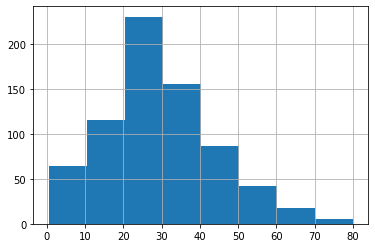

In [6]:
# Primary predictive task: predict who survives and who doesn't
# print(train_data['Survived'].value_counts())  # number of passengers that survived (1) or did not (0)
# print(train_data['Survived'].value_counts(normalize=True))  # percentage of passengers that survived (1) or did not (0)

# Potentially predictive features
# print(train_data['Pclass'].value_counts()) # number of passengers in each counts
# print(train_data['Sex'].value_counts()) # number of passengers by Sex
# print(train_data['Embarked'].value_counts()) # number of passengers embarked at each port
# print(train_data['Age'].describe()) # summary statistics on the age of passengers
train_data['Age'].hist(bins=8); # histogram of age grouped in bins of 10 years

After looking at the counts of different features, let's see how the features are dependent on one another

In [7]:
print(train_data[train_data['Pclass'] == 1])
first_class = train_data[train_data['Pclass']==1]
print('Average survival rate of first class: ', first_class['Survived'].mean())

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ... 

We can do the above for each class then compare the percentages of survival rate by classes, but their is an easier way to do this.  We can use `.groupby(column_name)` and `.apply(function)` or `.agg({'column_name':'summary_statistic'})` 

Here is an example of what a pandas groupby is doing

Grouping by Team
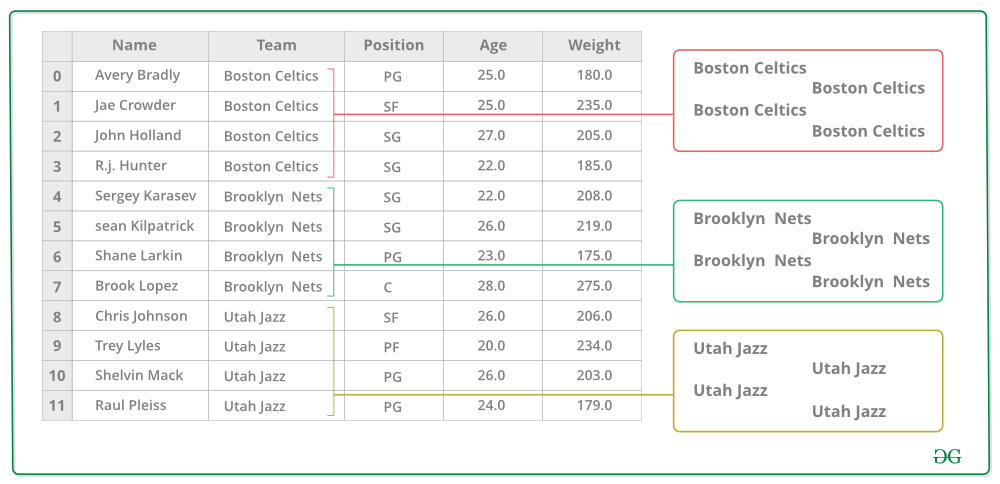

In [8]:
print(train_data.groupby('Pclass'))
print(train_data.groupby('Pclass').agg({'Age':'mean', 'Survived':'mean'})) # mean age and survival rate, grouped by class

train_data['Age_bucket'] = train_data['Age'].apply(lambda age: (age // 10)) 

print(train_data.groupby('Age_bucket').agg({'Survived':'mean'})) # mean survival rate by age bucket

              Age  Survived
Pclass                     
1       38.233441  0.629630
2       29.877630  0.472826
3       25.140620  0.242363
            Survived
Age_bucket          
0.0         0.612903
1.0         0.401961
2.0         0.350000
3.0         0.437126
4.0         0.382022
5.0         0.416667
6.0         0.315789
7.0         0.000000
8.0         1.000000


In [9]:
# We will start visualizing our data
# sns.barplot?

## Understanding the relationship between different variables and how they affect the outcome, Survive vs Didn't Survive

# sns.barplot(data=train_data, x='Pclass', y='Survived'); # Plotting class vs survival

# sns.barplot(data=train_data, x='Survived', y='Age'); # Survival rate by age

# sns.barplot(data=train_data, x='Survived', y='Age', hue='Pclass'); # average age of those who survived vs didn't survive, grouped by class (removing the effect of class)

# sns.barplot(data=train_data, x='Pclass', y='Age', hue='Survived'); # 

# sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived');

In [10]:
# Here we analyse the effects of sex, age, and fare vs survival rate

# sns.barplot(data=train_data, x='Sex', y='Survived')

# sns.barplot(data=train_data, x='Sex', y='Age')

# sns.barplot(data=train_data, x='Sex', y='Fare') # Plotting average Fare paid for ticket, grouped by Sex

# train_data.groupby('Sex').agg({'Pclass':'mean'})

# sns.barplot(data=train_data, x='Sex', y='Fare', hue='Pclass')

**Data Cleaning**: Getting your data in the right format to apply ML.  This involves removing or imputing null values, cleaning up messy data values, and transorming your data into valuable features.

In many 'toy' ML datasets such as the Titanic dataset, data cleaning is usually not as big a concern as it is for industry data.

In [11]:
# Let's look at null values in the Titanic ML dataset
train_data.isnull().sum()

### Null values for Age (177 in total)
# train_data[train_data['Age'].isnull()]
# age_null = train_data[train_data['Age'].isnull()]
# print(age_null[['Pclass','Survived']].mean())
# print(train_data[['Pclass', 'Survived']].mean())
# age_null[['Pclass','Survived']].mean() - train_data[['Pclass', 'Survived']].mean() # MAR: There is a dependency between class and null values for age
# train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median()) # One way: set this equal to train_data['Age']
# We can do better...
print(train_data.groupby('Pclass').agg({'Age':'mean'}))
train_data['Age'] = train_data.groupby('Pclass').apply(lambda x: x['Age'].fillna(x['Age'].median())).reset_index().set_index('level_1')


              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620


In [12]:
cabin_null = train_data[train_data['Cabin'].isnull()]
print('Number of null cabin values: ', len(cabin_null))
cabin_null[['Pclass','Survived']].mean() - train_data[['Pclass', 'Survived']].mean()

Number of null cabin values:  687


Pclass      0.330368
Survived   -0.083984
dtype: float64

**Feature Extraction and Engineering**: Find the most predictive features and transform features into an ML format. Feature engineering is sometimes used interchangeably with Data Cleaning.

In [13]:
train_data.head()  # we need to convert this to a set of features X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bucket
0,1,0,3,"Braund, Mr. Owen Harris",male,3.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,3.0


In [14]:
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data[['Survived']]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,3.0,1,0,7.2500,S
1,1,female,1.0,1,0,71.2833,C
2,3,female,3.0,0,0,7.9250,S
3,1,female,1.0,1,0,53.1000,S
4,3,male,3.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,2.0,0,0,13.0000,S
887,1,female,1.0,0,0,30.0000,S
888,3,female,3.0,1,2,23.4500,S
889,1,male,1.0,0,0,30.0000,C


**One Hot Encoding**: Commonly used to encode categorical variables as vectors, OHE creates a new column for each unique value of a variable.

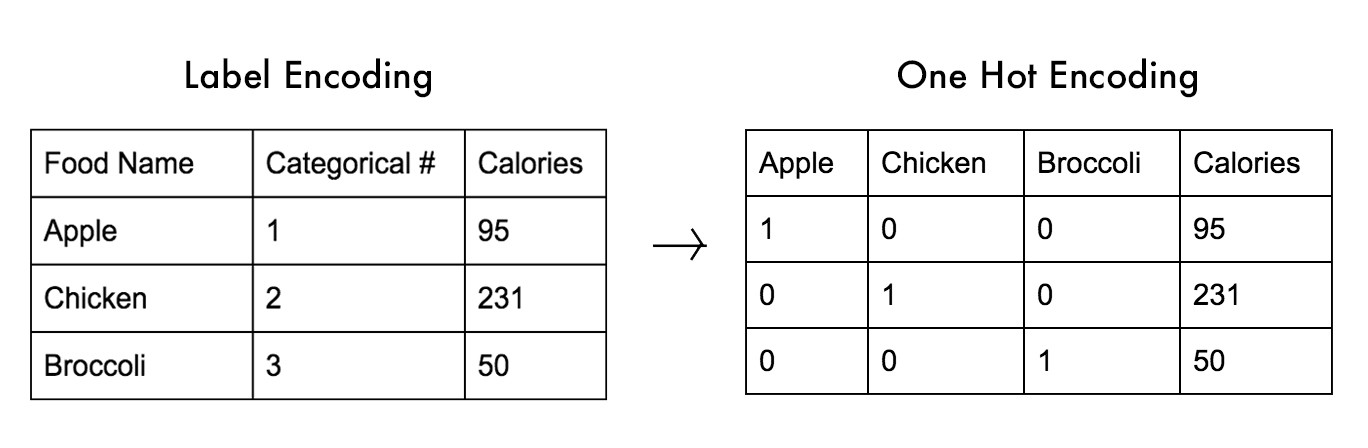

In [15]:
# Using pd.get_dummies() to encode variables
ohe_sex = pd.get_dummies(train_data['Sex'])
X = X.merge(ohe_sex, left_index=True, right_index=True)
print(X)

ohe_embarked = pd.get_dummies(train_data['Embarked'])
X = X.merge(ohe_embarked, left_index=True, right_index=True)
print(X)

X = X.drop(['Sex', 'Embarked'], axis=1)

     Pclass     Sex  Age  SibSp  Parch     Fare Embarked  female  male
0         3    male  3.0      1      0   7.2500        S       0     1
1         1  female  1.0      1      0  71.2833        C       1     0
2         3  female  3.0      0      0   7.9250        S       1     0
3         1  female  1.0      1      0  53.1000        S       1     0
4         3    male  3.0      0      0   8.0500        S       0     1
..      ...     ...  ...    ...    ...      ...      ...     ...   ...
886       2    male  2.0      0      0  13.0000        S       0     1
887       1  female  1.0      0      0  30.0000        S       1     0
888       3  female  3.0      1      2  23.4500        S       1     0
889       1    male  1.0      0      0  30.0000        C       0     1
890       3    male  3.0      0      0   7.7500        Q       0     1

[891 rows x 9 columns]
     Pclass     Sex  Age  SibSp  Parch     Fare Embarked  female  male  C  Q  \
0         3    male  3.0      1      0   7.2

In [16]:
X

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,3.0,1,0,7.2500,0,1,0,0,1
1,1,1.0,1,0,71.2833,1,0,1,0,0
2,3,3.0,0,0,7.9250,1,0,0,0,1
3,1,1.0,1,0,53.1000,1,0,0,0,1
4,3,3.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,2.0,0,0,13.0000,0,1,0,0,1
887,1,1.0,0,0,30.0000,1,0,0,0,1
888,3,3.0,1,2,23.4500,1,0,0,0,1
889,1,1.0,0,0,30.0000,0,1,1,0,0


In [17]:
X.loc[:, ['Age', 'Fare']]

,Age,Fare
0,3.0,7.2500
1,1.0,71.2833
2,3.0,7.9250
3,1.0,53.1000
4,3.0,8.0500
...,...,...
886,2.0,13.0000
887,1.0,30.0000
888,3.0,23.4500
889,1.0,30.0000


In [18]:
sc = StandardScaler()
X['Age_std'] = sc.fit_transform(X[['Age']])#.reshape(-1, 1)#, sc.fit_transform(X['Fare']).reshape(-1, 1)
X['Fare_std'] = sc.fit_transform(X[['Fare']])
X = X.drop(['Age', 'Fare'], axis=1)

**PCA Visualization of Data**  Let's visualize our features in two-dimensional space, grouped by our output variable, 'Survival', to see how separable our data is.  This will let us know how effective our feature engineering is.

<AxesSubplot:xlabel='feat_1', ylabel='feat_2'>

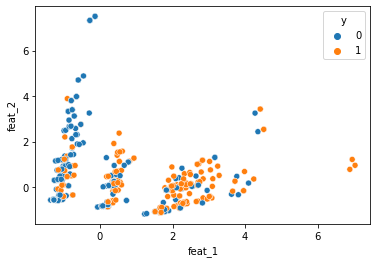

In [40]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pd.DataFrame(data=pca.transform(X))
data_pca = X_pca.copy()
data_pca['y'] = y
data_pca.columns = ['feat_1', 'feat_2', 'y']

sns.scatterplot(data=data_pca, x='feat_1', y='feat_2', hue='y');

**Model Selection and Performance**: Since this is a classification problem, we can use models such as kNN, Logistic Regression, Support Vector Machines, Decision Trees, and more.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rs = 42 # set our random seed to 42 for consistent results

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=rs)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

print('Accuracy: ',knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

In [ ]:
lr = LogisticRegression(C=1, random_state=rs)
lr.fit(X_train, y_train)

print('Accuracy: ',lr.score(X_test, y_test))

y_pred = lr.predict(X_test)
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

In [ ]:
svm = SVC(C=1, random_state=rs)
svm.fit(X_train, y_train)

print('Accuracy: ',svm.score(X_test, y_test))

y_pred = svm.predict(X_test)
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

In [ ]:
dc = DecisionTreeClassifier(random_state=rs)
dc.fit(X_train, y_train)

print('Accuracy: ',dc.score(X_test, y_test))

y_pred = dc.predict(X_test)
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

In [ ]:
rf = RandomForestClassifier(random_state=rs)
rf.fit(X_train, y_train)

print('Accuracy: ',rf.score(X_test, y_test))
y_pred = rf.predict(X_test)
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

**Hyperparameter selection** We select SVC (Support Vector Machine) as our classifier, we can now tune hyperparameters to optimize accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['poly', 'rbf', 'sigmoid'], 'C':[0.5, 1, 2, 5, 10], 'probability':[True, False], 'random_state':[42]}

clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)
print('Best Score:',clf.best_score_)
print('Best Parameters:',clf.best_params_)